In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_poisson_deviance, max_error
from statsmodels.tsa.arima.model import ARIMA

In [28]:
Datos = pd.read_excel('..\Datos\Alemania.xls', sheet_name= 'Data')
Datos.columns = Datos.iloc[2]
Datos = Datos[3:]
Datos.drop(['Country Name', 'Country Code', 'Indicator Code'], axis = 1 ,inplace= True)
Datos = Datos.T
Datos.columns = Datos.iloc[0]
Datos.dropna(axis = 1, inplace= True)
Datos = Datos.reset_index()
Datos[2][1:] = Datos[2][1:].astype(int)
Datos.set_index(2, inplace=True)
Datos = Datos[1:]

## Usaremos Este Dato Como Ejemplo

In [43]:
TIE = Datos['Tasa de inactividad por edades (% de la población en edad de trabajar)']

### Teoria
$$
E(TIE_t) = \bar{TIE}
$$
La Esperanza de la TASA DE INACTIVIDAD POR EDADES a la cual llamaremos TIE por sus siglas en español es en si la media de la Variable la cual es un numero fijo.
$$
V(TIE) = \sum_{t=1}^{k} {(TIE_t - E(TIE_{t}))^2} f(TIR)
$$
La Varianza es la en sumatoria de las variables en el tiempo restadas con la Esperanza vista anteriormente.
$$
Cov(TIE_t, TIE_{t-1}) = E(TIE_t - E(TIE_t))(TIE_{t-1} - E(TIE_{t-1})) = \gamma_1
$$
La Convarianza es por lo tanto la formula que tenemos al frente tomamos en cuenta que tanto $E(TIE_t)$ como $E(TIE_{t-1})$ son el mismo valor en realidad, Tambien llamaremos a partir de ahora a la covarianza como $\gamma_n$ el cual dependera de la covarianza que buscamos en relacion a la primera.

In [44]:
Media = TIE.mean()
Desv = (((TIE - Media)**2).sum())/len(TIE)
std = Desv**(1/2) 

In [52]:
def Covarianza(Datos):
    Media = TIE.mean()
    Indice = []
    Covarianzas = []
    for i in range(1,len(Datos)):
        Indice.append(f't-{i}')
        Covarianzas.append(((Datos.iloc[-1] - Media)*(Datos.iloc[len(Datos)-i] - Media)).sum()/len(Datos))
    
    return pd.DataFrame({
        'Indices': Indice,
        'Covarianzas': Covarianzas
    })

In [59]:
Reslt = Covarianza(TIE)
Reslt.head(5)

,Indices,Covarianzas
0,t-1,0.588965
1,t-2,0.511069
2,t-3,0.433870
3,t-4,0.353349
4,t-5,0.273112


$$
Corr(TIE_t, TIE_{t-1}) = \frac{Cov(TIE_t, TIE_{t-1})}{\sqrt{V(TIE) * V(TIE)}} = \rho_1
$$
O simplificado dado que la Varianza tambien es un Numero.
$$
Corr(TIE_t, TIE_{t-1}) = \frac{Cov(TIE_t, TIE_{t-1})}{V(TIE)} = \rho_1
$$

In [61]:
Reslt['Correlaciones']= Reslt['Covarianzas']/Desv
Reslt.head(5)

,Indices,Covarianzas,Correlaciones
0,t-1,0.588965,0.028850
1,t-2,0.511069,0.025035
2,t-3,0.433870,0.021253
3,t-4,0.353349,0.017309
4,t-5,0.273112,0.013378


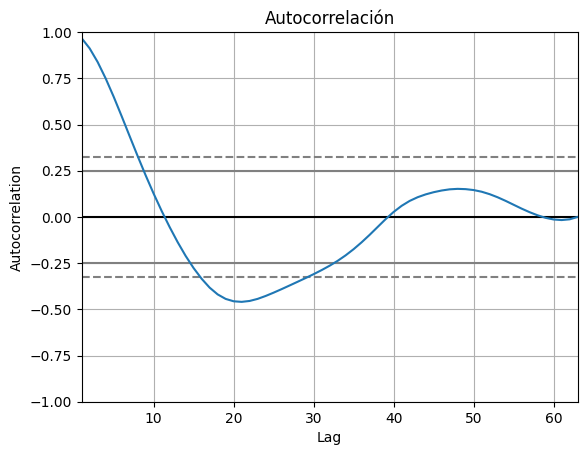

In [68]:
autocorr  = TIE.autocorr()
pd.plotting.autocorrelation_plot(TIE)
plt.title('Autocorrelación')
plt.show()